# Project - "Deep Learning Final Project"
## Topic: Logistics Supply chain real world data
### Real-World Insights: Optimizing Logistics and Supply Chain Data

#### About Dataset

**Problem set** : This is a multi-label delivery delay prediction problem, which is a challenge often encountered by supply chain practitioners from various industries in their daily operations.

**Testing** : A tabular dataset that consists of a set of variables related to delivery will be provided to the participants to develop their delay prediction models.

**Evaluation Metric**: An ideal delay prediction algorithm shall be able to accurately predict delivery arrival status.

Dataset Source: https://www.kaggle.com/datasets/pushpitkamboj/logistics-data-containing-real-world-data/data

### Basic Analysis and Visualisation

In [92]:
# All the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Define the file path
file_path = "logistics_data/incom2024_delay_example_dataset.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

payment_type  profit_per_order  sales_per_customer  category_id  \
0        DEBIT         34.448338            92.49099          9.0   
1     TRANSFER         91.193540           181.99008         48.0   
2        DEBIT          8.313806            89.96643         46.0   
3     TRANSFER        -89.463196            99.15065         17.0   
4        DEBIT         44.722590           170.97824         48.0   

          category_name customer_city customer_country  customer_id  \
0      Cardio Equipment        Caguas      Puerto Rico   12097.6830   
1          Water Sports   Albuquerque          EE. UU.    5108.1045   
2  Indoor/Outdoor Games      Amarillo      Puerto Rico    4293.4478   
3                Cleats        Caguas      Puerto Rico     546.5306   
4          Water Sports       Peabody          EE. UU.    1546.3980   

  customer_segment customer_state  ...     order_region  \
0         Consumer             PR  ...   Western Europe   
1         Consumer             CA  ...    South America   
2         Consumer             PR  ...   Western Europe   
3         Consumer             PR  ...  Central America   
4         Consumer             CA  ...  Central America   

                  order_state order_status  product_card_id  \
0                      Vienna     COMPLETE            191.0   
1                Buenos Aires      PENDING           1073.0   
2  Nord-Pas-de-Calais-Picardy     COMPLETE           1014.0   
3                   Santa Ana   PROCESSING            365.0   
4                    Illinois     COMPLETE           1073.0   

   product_category_id                       product_name product_price  \
0                  9.0  Nike Men's Free 5.0+ Running Shoe         99.99   
1                 48.0        Pelican Sunstream 100 Kayak        199.99   
2                 46.0   O'Brien Men's Neoprene Life Vest         49.98   
3                 17.0   Perfect Fitness Perfect Rip Deck         59.99   
4                 48.0        Pelican Sunstream 100 Kayak        199.99   

               shipping_date   shipping_mode label  
0  2015-08-13 00:00:00+01:00  Standard Class    -1  
1  2017-04-09 00:00:00+01:00  Standard Class    -1  
2  2015-03-18 00:00:00+00:00    Second Class     1  
3  2017-03-18 00:00:00+00:00    Second Class     0  
4  2015-03-30 00:00:00+01:00  Standard Class     1  

[5 rows x 41 columns]

In [94]:
# Define the dtypes file path
file_path1 = "logistics_data/incom2024_delay_variable_description.csv" 

# laod the dtypes file
dtypes = pd.read_csv(file_path1)

# Show the file to check the data types
dtypes

variable_name         type  \
0               payment_type  categorical   
1           profit_per_order    numerical   
2         sales_per_customer    numerical   
3                category_id    numerical   
4              category_name         text   
5              customer_city  categorical   
6           customer_country  categorical   
7                customer_id    numerical   
8           customer_segment  categorical   
9             customer_state  categorical   
10          customer_zipcode         text   
11             department_id    numerical   
12           department_name         text   
13                  latitude    numerical   
14                 longitude    numerical   
15                    market  categorical   
16                order_city  categorical   
17             order_country  categorical   
18         order_customer_id    numerical   
19                order_date     datetime   
20                  order_id    numerical   
21    order_item_cardprod_id    numerical   
22       order_item_discount    numerical   
23  order_item_discount_rate    numerical   
24             order_item_id    numerical   
25  order_item_product_price    numerical   
26   order_item_profit_ratio    numerical   
27       order_item_quantity    numerical   
28                     sales    numerical   
29   order_item_total_amount    numerical   
30    order_profit_per_order    numerical   
31              order_region  categorical   
32               order_state  categorical   
33              order_status  categorical   
34           product_card_id    numerical   
35       product_category_id    numerical   
36              product_name         text   
37             product_price    numerical   
38             shipping_date     datetime   
39             shipping_mode  categorical   
40                     label  categorical   

                                          description  
0                            Type of transaction made  
1                           Earnings per order placed  
2          Total sales per customer made per customer  
3                               Product category code  
4                 Description of the product category  
5           City where the customer made the purchase  
6        Country where the customer made the purchase  
7                                         Customer ID  
8   Types of Customers Consumer, Corporate, Home O...  
9   State to which the store where the purchase is...  
10                                   Customer Zipcode  
11                           Department code of store  
12                           Department name of store  
13        Latitude corresponding to location of store  
14       Longitude corresponding to location of store  
15  Market to where the order is delivered: Africa...  
16                      Destination city of the order  
17                   Destination country of the order  
18                                Customer order code  
19                    Date on which the order is made  
20                                         Order code  
21     Product code generated through the RFID reader  
22                          Order item discount value  
23                     Order item discount percentage  
24                                    Order item code  
25                 Price of products without discount  
26                            Order Item Profit Ratio  
27                       Number of products per order  
28                                     Value in sales  
29                             Total amount per order  
30                             Order Profit Per Order  
31  Region of the world where the order is deliver...  
32   State of the region where the order is delivered  
33  Order Status: COMPLETE, PENDING, CLOSED, PENDI...  
34                                       Product code  
35                              Product category code  
36                                       Product nam

In [95]:
# Basic check for dimensions of a DataFrame
df.shape

(15549, 41)

In [96]:
# Count the number of missing values (NaN)
df.isna().sum()

payment_type                0
profit_per_order            0
sales_per_customer          0
category_id                 0
category_name               0
customer_city               0
customer_country            0
customer_id                 0
customer_segment            0
customer_state              0
customer_zipcode            0
department_id               0
department_name             0
latitude                    0
longitude                   0
market                      0
order_city                  0
order_country               0
order_customer_id           0
order_date                  0
order_id                    0
order_item_cardprod_id      0
order_item_discount         0
order_item_discount_rate    0
order_item_id               0
order_item_product_price    0
order_item_profit_ratio     0
order_item_quantity         0
sales                       0
order_item_total_amount     0
order_profit_per_order      0
order_region                0
order_state                 0
order_stat

In [97]:
# Check the dypes of a DataFrame
df.dtypes

payment_type                 object
profit_per_order            float64
sales_per_customer          float64
category_id                 float64
category_name                object
customer_city                object
customer_country             object
customer_id                 float64
customer_segment             object
customer_state               object
customer_zipcode            float64
department_id               float64
department_name              object
latitude                    float64
longitude                   float64
market                       object
order_city                   object
order_country                object
order_customer_id           float64
order_date                   object
order_id                    float64
order_item_cardprod_id      float64
order_item_discount         float64
order_item_discount_rate    float64
order_item_id               float64
order_item_product_price    float64
order_item_profit_ratio     float64
order_item_quantity         

In [98]:
# Extract categorical column names from a DataFrame
categorical_columns = dtypes.loc[dtypes['type'] == 'categorical', 'variable_name'].tolist()
print(categorical_columns)

# Count the unique values for each categorical column in a DataFrame
df[categorical_columns].nunique()

['payment_type', 'customer_city', 'customer_country', 'customer_segment', 'customer_state', 'market', 'order_city', 'order_country', 'order_region', 'order_state', 'order_status', 'shipping_mode', 'label']


payment_type           4
customer_city        555
customer_country       2
customer_segment       3
customer_state        44
market                 5
order_city          2742
order_country        152
order_region          23
order_state          982
order_status           7
shipping_mode          4
label                  3
dtype: int64

In [99]:
# Print the frequency (count) of each unique value in these columns (df)
for cols in categorical_columns:
    print(df[cols].value_counts())
    print()


payment_type
DEBIT       6148
PAYMENT     3849
TRANSFER    3796
CASH        1756
Name: count, dtype: int64

customer_city
Caguas         5964
Brooklyn        300
Chicago         277
Los Angeles     259
Bronx           147
               ... 
Alhambra          1
Everett           1
Folsom            1
Irwin             1
Upland            1
Name: count, Length: 555, dtype: int64

customer_country
EE. UU.        9438
Puerto Rico    6111
Name: count, dtype: int64

customer_segment
Consumer       8332
Corporate      4603
Home Office    2614
Name: count, dtype: int64

customer_state
PR       6109
CA       2531
NY       1105
TX        816
IL        732
FL        435
PA        387
MI        310
OH        301
GA        241
NJ        221
AZ        210
KY        206
MD        206
NV        159
NC        158
VA        114
OR        100
TN         98
CO         94
WA         88
IN         74
HI         70
UT         69
MA         66
WI         65
MN         65
CT         65
SC         60
MO       

In [100]:
# Count the customer_city
customer_city_count = df['customer_city'].value_counts()
customer_city_count

customer_city
Caguas         5964
Brooklyn        300
Chicago         277
Los Angeles     259
Bronx           147
               ... 
Alhambra          1
Everett           1
Folsom            1
Irwin             1
Upland            1
Name: count, Length: 555, dtype: int64

In [101]:
# Check if customer_city_count less than 50
city_count_less_50 = customer_city_count[customer_city_count < 50].index.to_list()
# city_count_less_50

In [102]:
# Replace the cities with low occurrences (less than 50)
df1 = df.copy()
df1['customer_city'] = df1['customer_city'].apply(lambda x: 'Others' if x in city_count_less_50 else x)
df1['customer_city'].value_counts() 

customer_city
Others          7104
Caguas          5964
Brooklyn         300
Chicago          277
Los Angeles      259
Bronx            147
Philadelphia      95
Honolulu          89
Dallas            86
Houston           86
Aurora            86
Las Vegas         82
New York          80
Lancaster         76
Columbus          75
San Jose          72
Tucson            70
Denver            66
Escondido         66
Tampa             64
San Diego         63
Baltimore         60
San Antonio       59
Modesto           59
Washington        56
Memphis           56
New Orleans       52
Name: count, dtype: int64

In [103]:
# Check if customer_state_count less than 50
customer_state_count = df1['customer_state'].value_counts()
customer_state_less_50 = customer_state_count[customer_state_count < 50].index.to_list()
# customer_state_less_50

In [104]:
# Replace the states with low occurrences (less than 50)
df1['customer_state'] = df1['customer_state'].apply(lambda x: 'Others' if x in customer_state_less_50 else x)
df1['customer_state'].value_counts()

customer_state
PR        6109
CA        2531
NY        1105
TX         816
IL         732
FL         435
PA         387
MI         310
OH         301
Others     283
GA         241
NJ         221
AZ         210
MD         206
KY         206
NV         159
NC         158
VA         114
OR         100
TN          98
CO          94
WA          88
IN          74
HI          70
UT          69
MA          66
CT          65
WI          65
MN          65
SC          60
MO          57
WV          54
Name: count, dtype: int64

In [105]:
# Count the order_country
country_count = df1['order_country'].value_counts()
country_count

order_country
United States           2048
Mexico                  1252
France                  1215
Australia                812
Germany                  809
                        ... 
Costa Rica                 1
Armenia                    1
Eslovenia                  1
Paraguay                   1
United Arab Emirates       1
Name: count, Length: 152, dtype: int64

In [106]:
# Check if order_country count less than 50
country_count_less_50 = country_count[country_count < 50].index.to_list()
# country_count_less_50

In [107]:
# Replace the country with low occurrences (less than 50)
df1['order_country'] = df1['order_country'].apply(lambda x: 'Others' if x in country_count_less_50 else x)
df1['order_country'].value_counts()

order_country
United States                       2048
Mexico                              1252
France                              1215
Others                              1120
Australia                            812
Germany                              809
Brazil                               666
United Kingdom                       656
China                                534
India                                412
Italy                                404
Indonesia                            375
Spain                                360
Dominican Republic                   311
Cuba                                 293
El Salvador                          293
Turkey                               282
Honduras                             281
Guatemala                            233
Nicaragua                            208
Filipinas                            201
Nigeria                              195
Thailand                             184
Netherlands                          168
Pa

In [108]:
# Check if the region count less than 100
region_count = df1['order_region'].value_counts()
region_less_100 = region_count[region_count < 100].index.to_list()
region_less_100

['Canada', 'Southern Africa', 'Central Asia']

In [109]:
# Replace the region with low occurrences (less than 100)
df1['order_region'] = df1['order_region'].apply(lambda x : 'Others' if x in region_less_100 else x)
df1['order_region'].value_counts()

order_region
Western Europe     2513
Central America    2469
South America      1223
Northern Europe     900
Oceania             898
Southern Europe     861
Southeast Asia      849
Caribbean           690
Eastern Asia        683
West of USA         641
East of USA         603
West Asia           569
South Asia          559
US Center           474
South of  USA       335
West Africa         300
Eastern Europe      251
North Africa        244
East Africa         228
Others              144
Central Africa      115
Name: count, dtype: int64

In [110]:
# Check if order_state less than 50
order_state_count = df1['order_state'].value_counts()
order_state_less_50 = order_state_count[order_state_count < 50].index.to_list()

# Replace the order_state with low occurrences (less than 50)
df1['order_state'] = df1['order_state'].apply(lambda x : 'Others' if x in order_state_less_50 else x)
df1['order_state'].value_counts()

order_state
Others                                 7825
England                                 654
California                              450
Isle of France                          382
North Rhine-Westphalia                  314
                                       ... 
Western Australia                        52
Hamburg                                  52
Minas Gerais                             51
Rhineland-Palatinate                     50
Aquitaine-Limousin-Poitou-Charentes      50
Name: count, Length: 61, dtype: int64

In [111]:
# Print the frequency (count) of each unique value in these columns (df1)
for cols in categorical_columns:
    print(df1[cols].value_counts())
    print()

payment_type
DEBIT       6148
PAYMENT     3849
TRANSFER    3796
CASH        1756
Name: count, dtype: int64

customer_city
Others          7104
Caguas          5964
Brooklyn         300
Chicago          277
Los Angeles      259
Bronx            147
Philadelphia      95
Honolulu          89
Dallas            86
Houston           86
Aurora            86
Las Vegas         82
New York          80
Lancaster         76
Columbus          75
San Jose          72
Tucson            70
Denver            66
Escondido         66
Tampa             64
San Diego         63
Baltimore         60
San Antonio       59
Modesto           59
Washington        56
Memphis           56
New Orleans       52
Name: count, dtype: int64

customer_country
EE. UU.        9438
Puerto Rico    6111
Name: count, dtype: int64

customer_segment
Consumer       8332
Corporate      4603
Home Office    2614
Name: count, dtype: int64

customer_state
PR        6109
CA        2531
NY        1105
TX         816
IL         732
FL    

In [112]:
# Extract only categorical columns from df1 and display the few rows
cat_df = df1[categorical_columns]
cat_df.head()

payment_type customer_city customer_country customer_segment customer_state  \
0        DEBIT        Caguas      Puerto Rico         Consumer             PR   
1     TRANSFER        Others          EE. UU.         Consumer             CA   
2        DEBIT        Others      Puerto Rico         Consumer             PR   
3     TRANSFER        Caguas      Puerto Rico         Consumer             PR   
4        DEBIT        Others          EE. UU.         Consumer             CA   

   market    order_city order_country     order_region  \
0  Europe         Viena       Austria   Western Europe   
1   LATAM  Buenos Aires     Argentina    South America   
2  Europe        Burnie        France   Western Europe   
3   LATAM     Santa Ana   El Salvador  Central America   
4   LATAM      Blumenau        Mexico  Central America   

                  order_state order_status   shipping_mode  label  
0                      Vienna     COMPLETE  Standard Class     -1  
1                Buenos Aires      PENDING  Standard Class     -1  
2  Nord-Pas-de-Calais-Picardy     COMPLETE    Second Class      1  
3                      Others   PROCESSING    Second Class      0  
4                    Illinois     COMPLETE  Standard Class      1

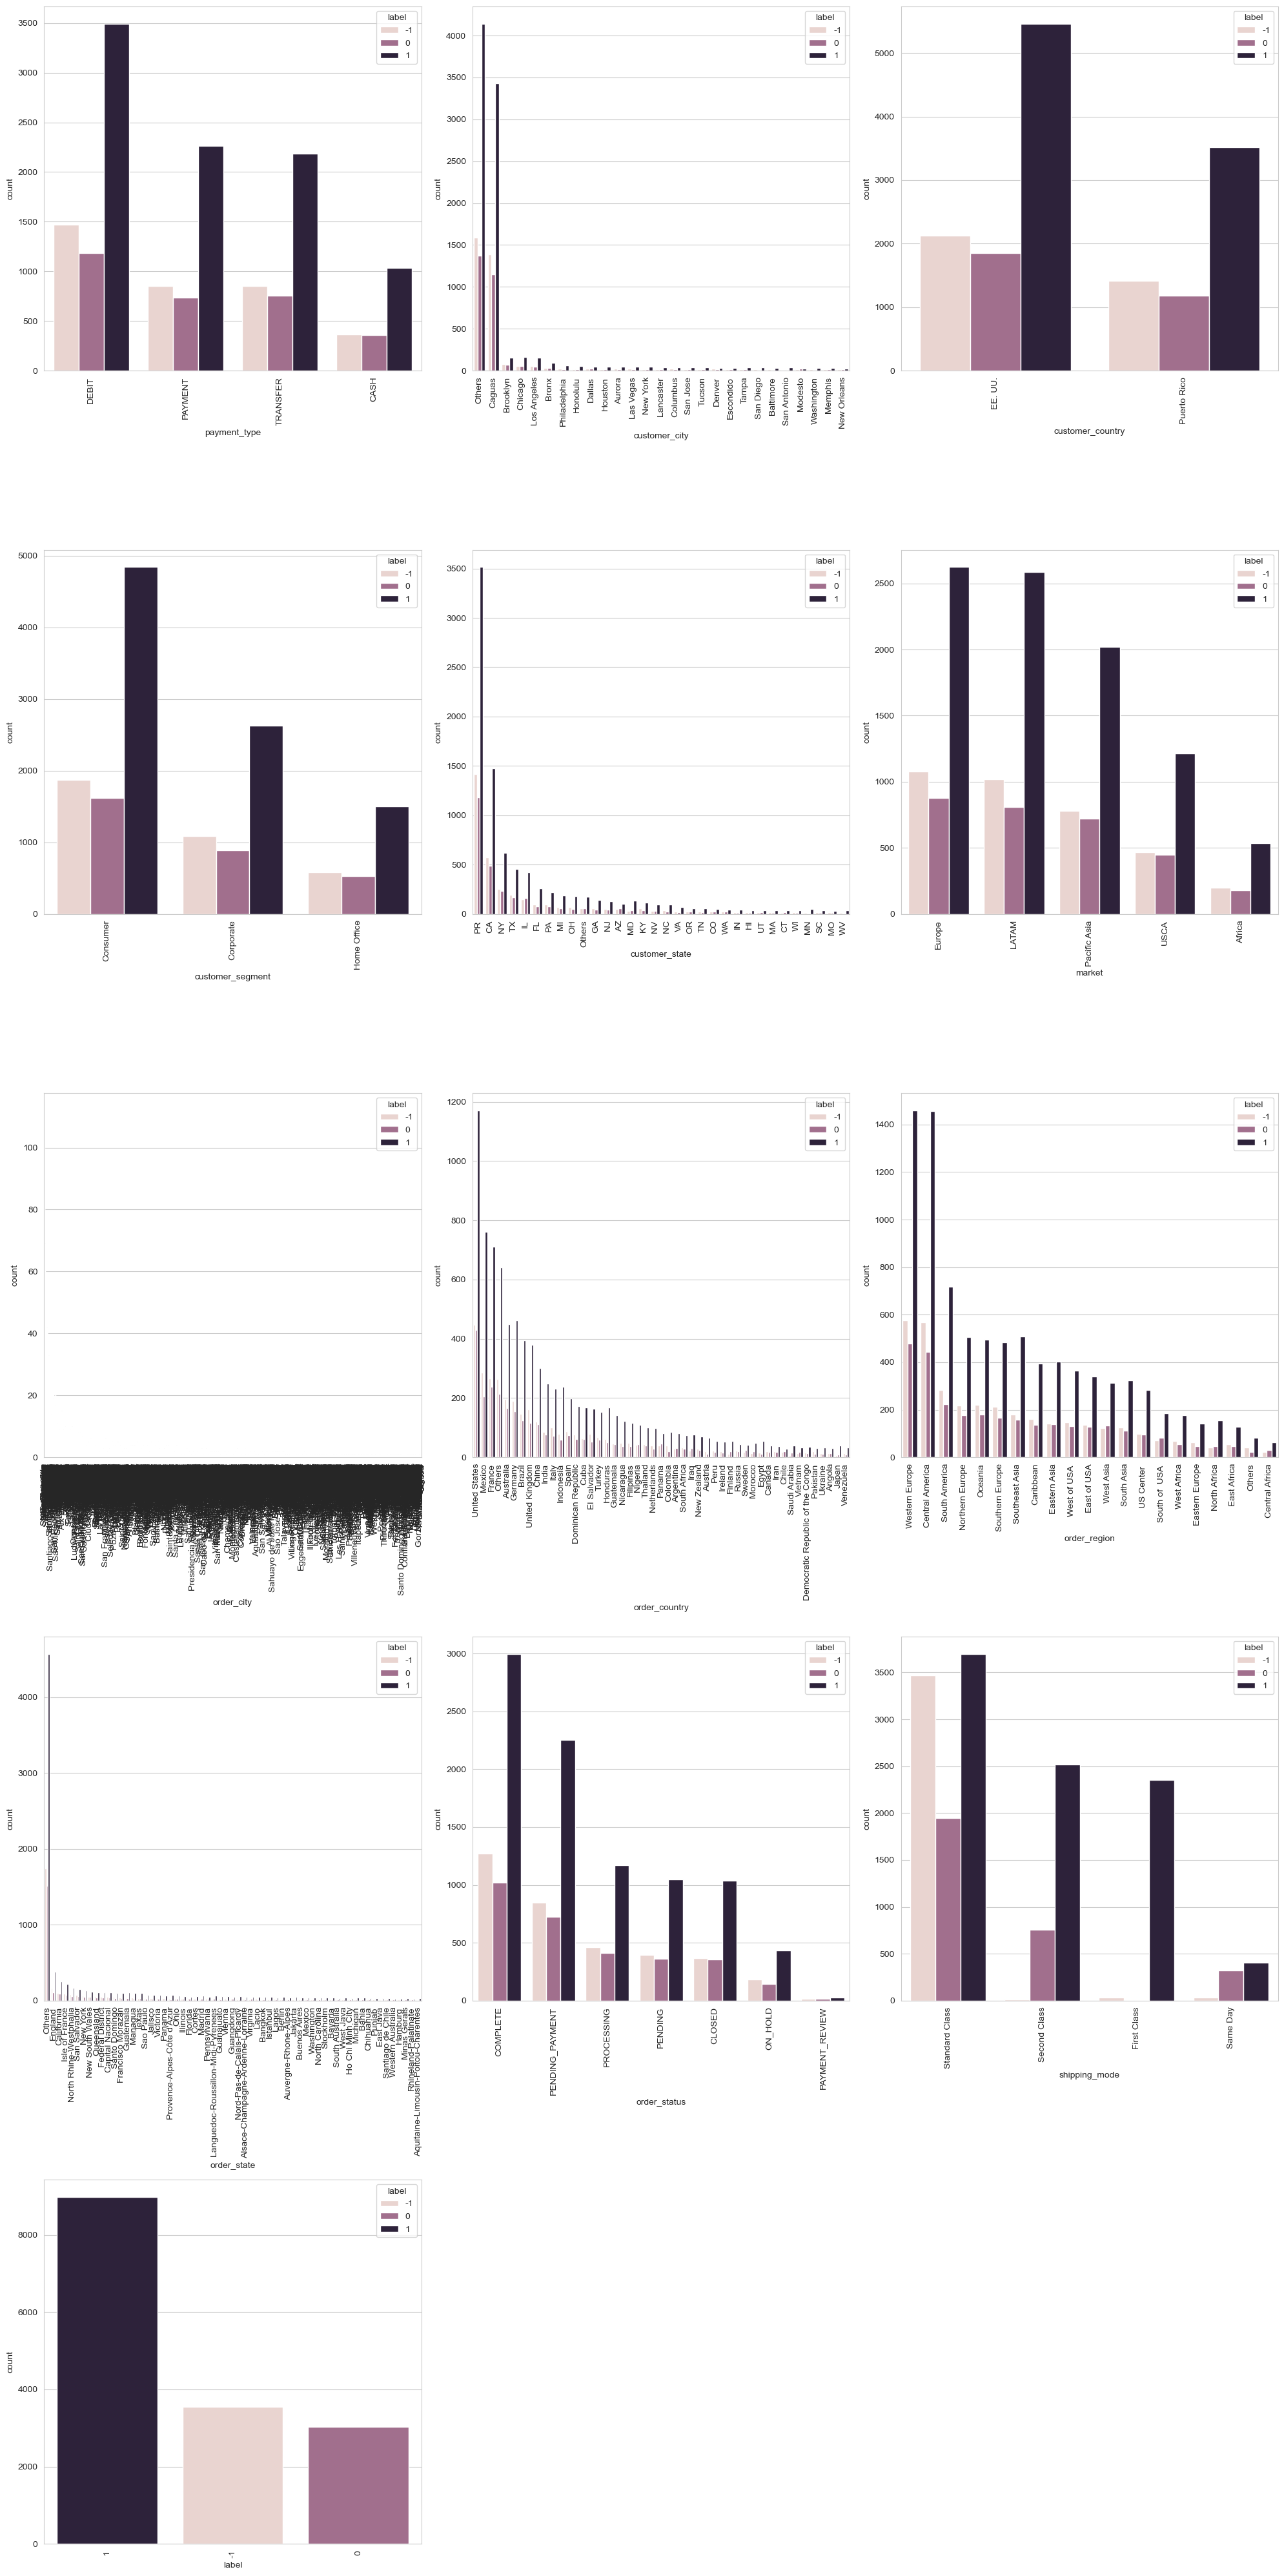

In [113]:
# EDA - bar plt of each categorical column with respect to label
plt.figure(figsize = (20,40))

for i,col in enumerate(cat_df.columns):
    plt.subplot(5,3,i+1)
    sns.countplot(data = cat_df , x = col , hue = 'label' , 
                  order = cat_df[col].value_counts().index)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [114]:
# Chi-square test of independence

from scipy.stats import chi2_contingency

independent_cols = []

for col in cat_df.columns:
    observed_frequency = pd.crosstab(cat_df[col], cat_df['label'])
    chi = chi2_contingency(observed_frequency)
    if chi.pvalue < 0.1:
        print(f"{col} is dependend , its pvalue is {chi.pvalue}")
    else:
        print(f"{col} is independend , its pvalue is {chi.pvalue}")
        independent_cols.append(col)
    print()

print(independent_cols)

payment_type is dependend , its pvalue is 0.09201325353390488

customer_city is independend , its pvalue is 0.714346188726933

customer_country is independend , its pvalue is 0.6338024052316169

customer_segment is independend , its pvalue is 0.5467227344684286

customer_state is independend , its pvalue is 0.5088211580809392

market is independend , its pvalue is 0.1727618157341103

order_city is independend , its pvalue is 0.5959351948370122

order_country is independend , its pvalue is 0.4317049352211438

order_region is independend , its pvalue is 0.4488613000001633

order_state is independend , its pvalue is 0.8969566845614264

order_status is independend , its pvalue is 0.24334708915531636

shipping_mode is dependend , its pvalue is 0.0

label is dependend , its pvalue is 0.0

['customer_city', 'customer_country', 'customer_segment', 'customer_state', 'market', 'order_city', 'order_country', 'order_region', 'order_state', 'order_status']


In [115]:
# Drop the independent feature after apply Chi-square test
df2 = df1.drop(independent_cols, axis= 'columns')
df2.head()

payment_type  profit_per_order  sales_per_customer  category_id  \
0        DEBIT         34.448338            92.49099          9.0   
1     TRANSFER         91.193540           181.99008         48.0   
2        DEBIT          8.313806            89.96643         46.0   
3     TRANSFER        -89.463196            99.15065         17.0   
4        DEBIT         44.722590           170.97824         48.0   

          category_name  customer_id  customer_zipcode  department_id  \
0      Cardio Equipment   12097.6830          725.0000            3.0   
1          Water Sports    5108.1045        92745.1600            7.0   
2  Indoor/Outdoor Games    4293.4478         2457.7297            7.0   
3                Cleats     546.5306          725.0000            4.0   
4          Water Sports    1546.3980        95118.6000            7.0   

  department_name   latitude  ...   sales  order_item_total_amount  \
0        Footwear  18.359064  ...   99.99                 84.99157   
1        Fan Shop  37.636528  ...  199.99                181.99000   
2        Fan Shop  18.294100  ...   99.96                 93.81015   
3         Apparel  18.202435  ...  119.98                 99.89060   
4        Fan Shop  38.719500  ...  199.99                171.07587   

  order_profit_per_order  product_card_id  product_category_id  \
0              32.083145            191.0                  9.0   
1              91.235870           1073.0                 48.0   
2               6.965549           1014.0                 46.0   
3             -95.401400            365.0                 17.0   
4              44.569000           1073.0                 48.0   

                        product_name  product_price  \
0  Nike Men's Free 5.0+ Running Shoe          99.99   
1        Pelican Sunstream 100 Kayak         199.99   
2   O'Brien Men's Neoprene Life Vest          49.98   
3   Perfect Fitness Perfect Rip Deck          59.99   
4        Pelican Sunstream 100 Kayak         199.99   

               shipping_date   shipping_mode  label  
0  2015-08-13 00:00:00+01:00  Standard Class     -1  
1  2017-04-09 00:00:00+01:00  Standard Class     -1  
2  2015-03-18 00:00:00+00:00    Second Class      1  
3  2017-03-18 00:00:00+00:00    Second Class      0  
4  2015-03-30 00:00:00+01:00  Standard Class      1  

[5 rows x 31 columns]

In [116]:
# Check the shape
df2.shape

(15549, 31)

In [117]:
# List all the numerical columns
numerical_columns = list(dtypes[dtypes['type'] =='numerical']['variable_name'])
print(numerical_columns)

['profit_per_order', 'sales_per_customer', 'category_id', 'customer_id', 'department_id', 'latitude', 'longitude', 'order_customer_id', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_id', 'order_item_product_price', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total_amount', 'order_profit_per_order', 'product_card_id', 'product_category_id', 'product_price']


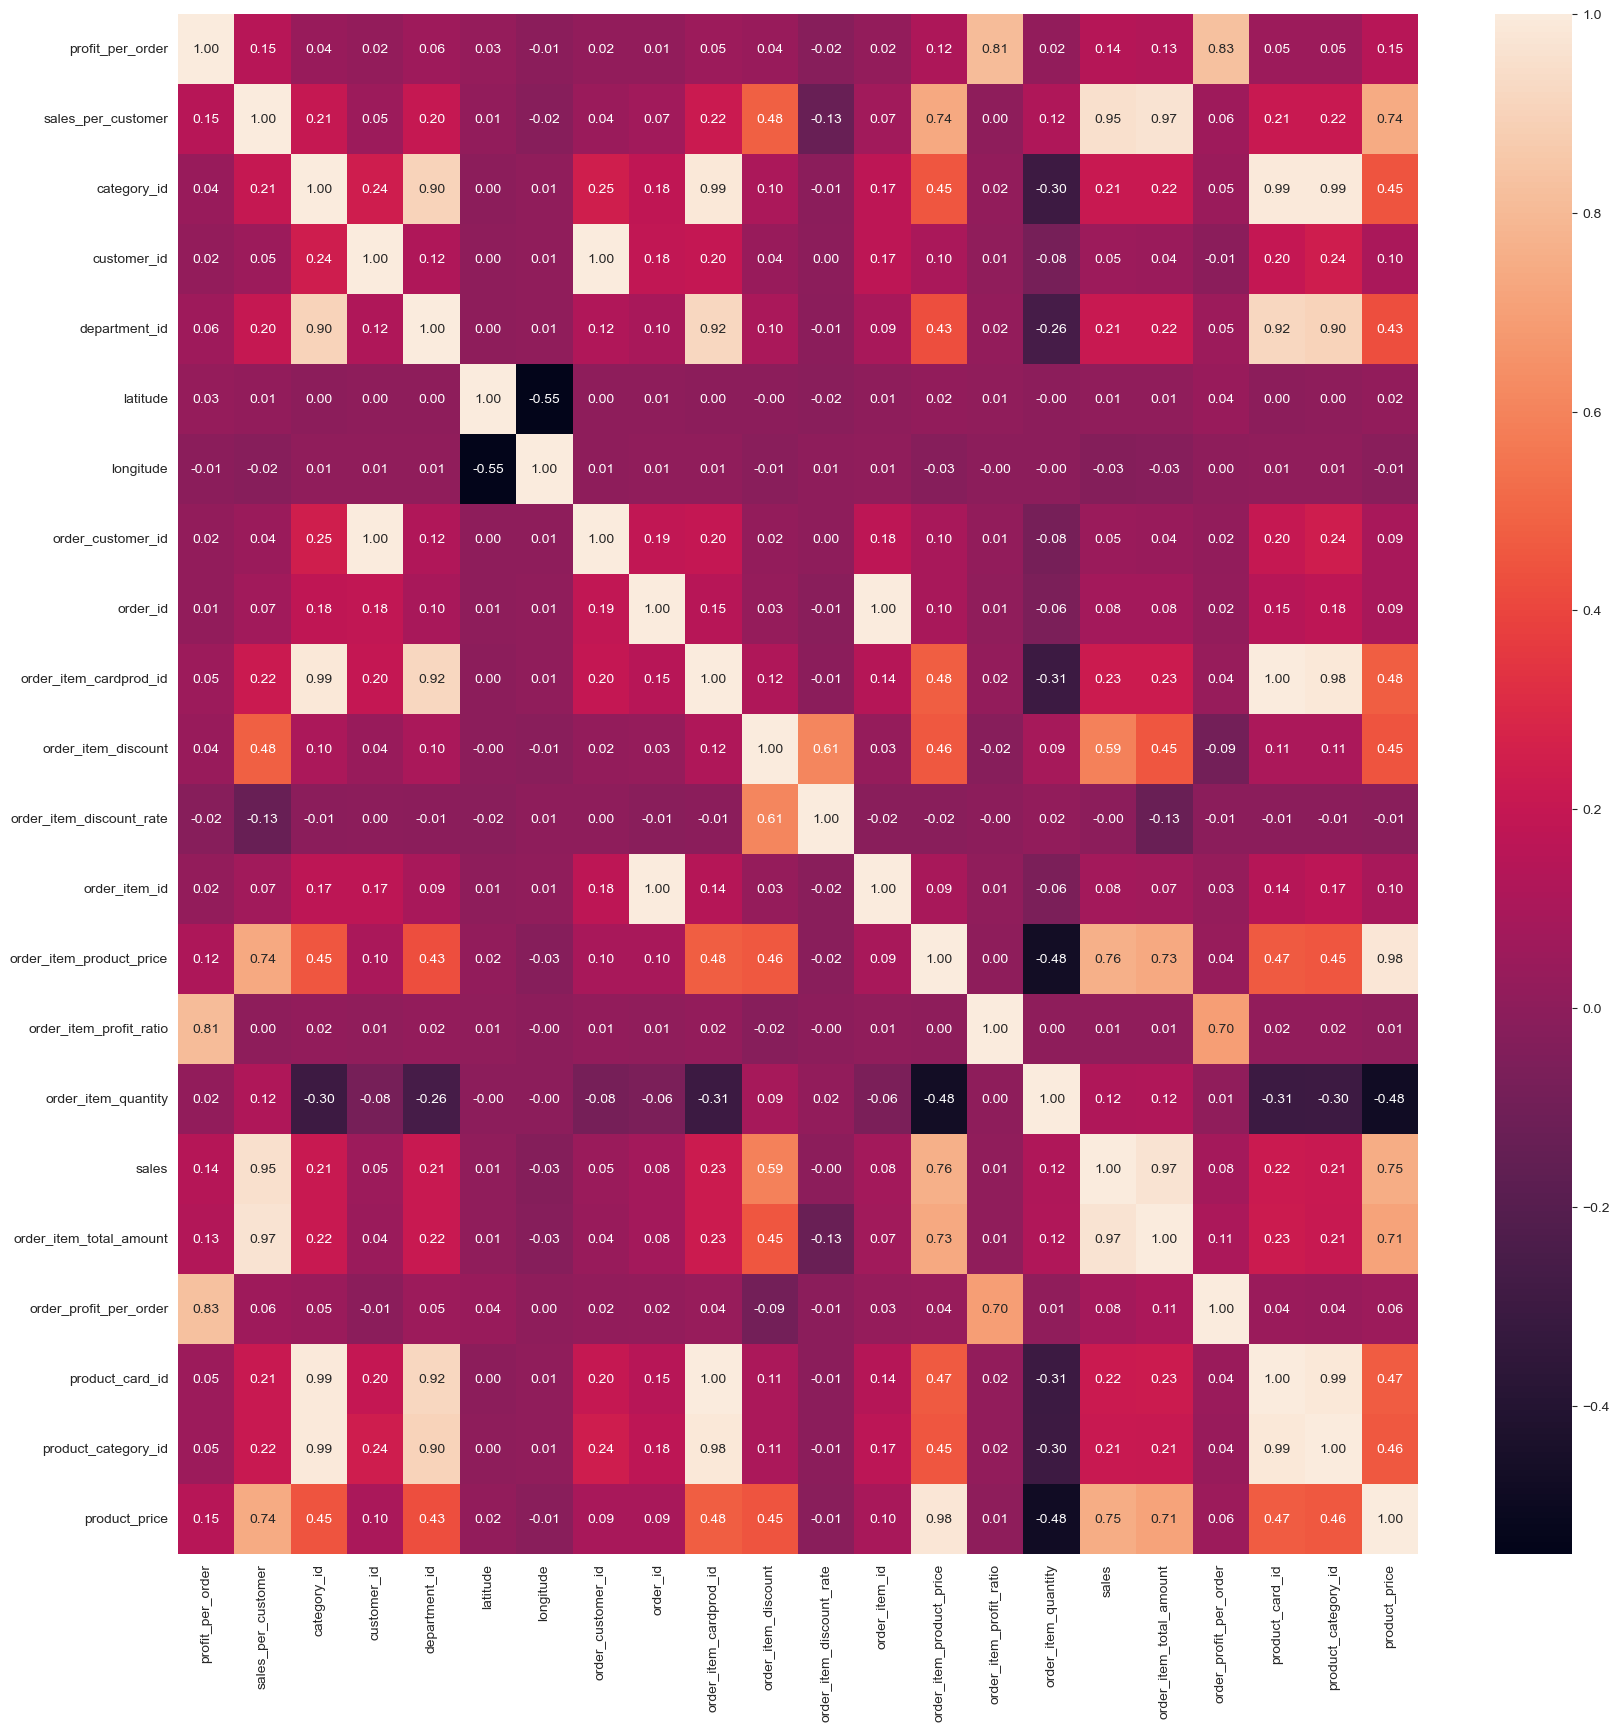

In [118]:
# Heatmap Correlation of df2
plt.figure(figsize = (20, 20))
sns.heatmap(df2[numerical_columns].corr(), annot=True, fmt = '.2f')
plt.show()

In [119]:
# After checking the heatmap above, some columns should be removed

from statsmodels.stats.outliers_influence import variance_inflation_factor

cols_to_remove = []

X_vif1 = df2[numerical_columns]
X_vif1.insert(0,"const",1)

while True:
    vif1 = pd.Series([variance_inflation_factor(X_vif1,i) for i in range(X_vif1.shape[1])] , index=X_vif1.columns)
    if vif1[1:].max() > 5:
        cols_to_remove.append(vif1[1:].idxmax())
        X_vif1 = X_vif1.drop(vif1[1:].idxmax() , axis ='columns')
    else:
        break


for col in vif1[1:].keys():
    if vif1[1:][col] == 0:
        cols_to_remove.append(col)
    else:
        pass
    

print(cols_to_remove)

['order_id', 'order_customer_id', 'product_card_id', 'category_id', 'order_item_cardprod_id', 'order_item_total_amount', 'order_item_product_price', 'sales', 'product_price', 'product_category_id', 'profit_per_order']


In [120]:
# Remove the listed columns above
df3 = df2.drop(cols_to_remove , axis = 'columns')
df3.head()

payment_type  sales_per_customer         category_name  customer_id  \
0        DEBIT            92.49099      Cardio Equipment   12097.6830   
1     TRANSFER           181.99008          Water Sports    5108.1045   
2        DEBIT            89.96643  Indoor/Outdoor Games    4293.4478   
3     TRANSFER            99.15065                Cleats     546.5306   
4        DEBIT           170.97824          Water Sports    1546.3980   

   customer_zipcode  department_id department_name   latitude   longitude  \
0          725.0000            3.0        Footwear  18.359064  -66.370575   
1        92745.1600            7.0        Fan Shop  37.636528 -121.119630   
2         2457.7297            7.0        Fan Shop  18.294100  -66.037056   
3          725.0000            4.0         Apparel  18.202435  -66.370510   
4        95118.6000            7.0        Fan Shop  38.719500 -122.319720   

                  order_date  order_item_discount  order_item_discount_rate  \
0  2015-08-12 00:00:00+01:00            12.623338                      0.13   
1  2017-02-10 00:00:00+00:00            16.500000                      0.07   
2  2015-01-01 00:00:00+00:00             6.600000                      0.06   
3  2017-05-31 00:00:00+01:00            16.942171                      0.16   
4  2015-03-28 00:00:00+00:00            29.990000                      0.15   

   order_item_id  order_item_profit_ratio  order_item_quantity  \
0      38030.996                     0.41                  1.0   
1     142621.780                     0.48                  1.0   
2      18723.178                     0.09                  2.0   
3     141654.580                    -0.80                  2.0   
4      14204.896                     0.27                  1.0   

   order_profit_per_order                       product_name  \
0               32.083145  Nike Men's Free 5.0+ Running Shoe   
1               91.235870        Pelican Sunstream 100 Kayak   
2                6.965549   O'Brien Men's Neoprene Life Vest   
3              -95.401400   Perfect Fitness Perfect Rip Deck   
4               44.569000        Pelican Sunstream 100 Kayak   

               shipping_date   shipping_mode  label  
0  2015-08-13 00:00:00+01:00  Standard Class     -1  
1  2017-04-09 00:00:00+01:00  Standard Class     -1  
2  2015-03-18 00:00:00+00:00    Second Class      1  
3  2017-03-18 00:00:00+00:00    Second Class      0  
4  2015-03-30 00:00:00+01:00  Standard Class      1

In [121]:
# Check the shape of df3
df3.shape

(15549, 20)

In [122]:
# Check the unique values of the dataframe
dtypes['type'].unique()

array(['categorical', 'numerical', 'text', 'datetime'], dtype=object)

In [123]:
# Extract the column names classified as text data
text_cols = dtypes[dtypes['type'] == 'text'].variable_name.to_list()
text_cols

['category_name', 'customer_zipcode', 'department_name', 'product_name']

In [124]:
# Create a new DataFrame text_df containing only the text columns and the target label from df3
text_df = df3[text_cols]
text_df['label'] = df3['label']
text_df.head()

C:\Users\PHAT\AppData\Local\Temp\ipykernel_22648\1101349203.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



category_name  customer_zipcode department_name  \
0      Cardio Equipment          725.0000        Footwear   
1          Water Sports        92745.1600        Fan Shop   
2  Indoor/Outdoor Games         2457.7297        Fan Shop   
3                Cleats          725.0000         Apparel   
4          Water Sports        95118.6000        Fan Shop   

                        product_name  label  
0  Nike Men's Free 5.0+ Running Shoe     -1  
1        Pelican Sunstream 100 Kayak     -1  
2   O'Brien Men's Neoprene Life Vest      1  
3   Perfect Fitness Perfect Rip Deck      0  
4        Pelican Sunstream 100 Kayak      1

In [125]:
# Check the unique values of df3
df3[text_cols].nunique()

category_name         49
customer_zipcode    9170
department_name       11
product_name         113
dtype: int64

In [126]:
# Chi-square test of independence

independent_text_cols = []

for col in text_df.columns:
    observed_frequency = pd.crosstab(text_df[col],text_df['label'])
    chi = chi2_contingency(observed_frequency)
    if chi.pvalue < 0.1:
        print(f"{col} is dependend , its pvalue is {chi.pvalue}")
    else:
        print(f"{col} is independend , its pvalue is {chi.pvalue}")
        independent_text_cols.append(col)
    print()
    
print(independent_text_cols)

category_name is independend , its pvalue is 0.4067336658032077

customer_zipcode is independend , its pvalue is 0.5777060509821592

department_name is independend , its pvalue is 0.925740651505972

product_name is independend , its pvalue is 0.39531359295937923

label is dependend , its pvalue is 0.0

['category_name', 'customer_zipcode', 'department_name', 'product_name']


In [127]:
# Remove independent_text_cols above after checking with chi-square test
df4 = df3.drop(independent_text_cols , axis = 'columns')
df4.head()

payment_type  sales_per_customer  customer_id  department_id   latitude  \
0        DEBIT            92.49099   12097.6830            3.0  18.359064   
1     TRANSFER           181.99008    5108.1045            7.0  37.636528   
2        DEBIT            89.96643    4293.4478            7.0  18.294100   
3     TRANSFER            99.15065     546.5306            4.0  18.202435   
4        DEBIT           170.97824    1546.3980            7.0  38.719500   

    longitude                 order_date  order_item_discount  \
0  -66.370575  2015-08-12 00:00:00+01:00            12.623338   
1 -121.119630  2017-02-10 00:00:00+00:00            16.500000   
2  -66.037056  2015-01-01 00:00:00+00:00             6.600000   
3  -66.370510  2017-05-31 00:00:00+01:00            16.942171   
4 -122.319720  2015-03-28 00:00:00+00:00            29.990000   

   order_item_discount_rate  order_item_id  order_item_profit_ratio  \
0                      0.13      38030.996                     0.41   
1                      0.07     142621.780                     0.48   
2                      0.06      18723.178                     0.09   
3                      0.16     141654.580                    -0.80   
4                      0.15      14204.896                     0.27   

   order_item_quantity  order_profit_per_order              shipping_date  \
0                  1.0               32.083145  2015-08-13 00:00:00+01:00   
1                  1.0               91.235870  2017-04-09 00:00:00+01:00   
2                  2.0                6.965549  2015-03-18 00:00:00+00:00   
3                  2.0              -95.401400  2017-03-18 00:00:00+00:00   
4                  1.0               44.569000  2015-03-30 00:00:00+01:00   

    shipping_mode  label  
0  Standard Class     -1  
1  Standard Class     -1  
2    Second Class      1  
3    Second Class      0  
4  Standard Class      1

In [128]:
# Check the shape of df4
df4.shape

(15549, 16)

In [129]:
# Check if the columns are in datetime format
date_cols = dtypes[dtypes['type'] == 'datetime'].variable_name.to_list()
date_cols

['order_date', 'shipping_date']

In [130]:
df4[date_cols]

order_date              shipping_date
0      2015-08-12 00:00:00+01:00  2015-08-13 00:00:00+01:00
1      2017-02-10 00:00:00+00:00  2017-04-09 00:00:00+01:00
2      2015-01-01 00:00:00+00:00  2015-03-18 00:00:00+00:00
3      2017-05-31 00:00:00+01:00  2017-03-18 00:00:00+00:00
4      2015-03-28 00:00:00+00:00  2015-03-30 00:00:00+01:00
...                          ...                        ...
15544  2017-04-03 00:00:00+01:00  2017-04-03 00:00:00+01:00
15545  2017-03-06 00:00:00+00:00  2017-06-05 00:00:00+01:00
15546  2015-06-01 00:00:00+01:00  2015-05-04 00:00:00+01:00
15547  2016-01-31 00:00:00+00:00  2016-04-07 00:00:00+01:00
15548  2017-04-16 00:00:00+01:00  2017-09-15 00:00:00+01:00

[15549 rows x 2 columns]

In [131]:
# Convert the datatype and calculate processing time
od = pd.to_datetime(df4['order_date'])
sd = pd.to_datetime(df4['shipping_date'])

processingTime = (sd - od)
processingTime

C:\Users\PHAT\AppData\Local\Temp\ipykernel_22648\2270973114.py:2: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`

C:\Users\PHAT\AppData\Local\Temp\ipykernel_22648\2270973114.py:3: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



0           1 days 00:00:00
1          57 days 23:00:00
2          76 days 00:00:00
3        -74 days +01:00:00
4           1 days 23:00:00
                ...        
15544       0 days 00:00:00
15545      90 days 23:00:00
15546    -28 days +00:00:00
15547      66 days 23:00:00
15548     152 days 00:00:00
Length: 15549, dtype: object

In [132]:
# Add processingTime into DataFrame
df4.insert(0,'processingTime',processingTime)
df4.head()

processingTime payment_type  sales_per_customer  customer_id  \
0     1 days 00:00:00        DEBIT            92.49099   12097.6830   
1    57 days 23:00:00     TRANSFER           181.99008    5108.1045   
2    76 days 00:00:00        DEBIT            89.96643    4293.4478   
3  -74 days +01:00:00     TRANSFER            99.15065     546.5306   
4     1 days 23:00:00        DEBIT           170.97824    1546.3980   

   department_id   latitude   longitude                 order_date  \
0            3.0  18.359064  -66.370575  2015-08-12 00:00:00+01:00   
1            7.0  37.636528 -121.119630  2017-02-10 00:00:00+00:00   
2            7.0  18.294100  -66.037056  2015-01-01 00:00:00+00:00   
3            4.0  18.202435  -66.370510  2017-05-31 00:00:00+01:00   
4            7.0  38.719500 -122.319720  2015-03-28 00:00:00+00:00   

   order_item_discount  order_item_discount_rate  order_item_id  \
0            12.623338                      0.13      38030.996   
1            16.500000                      0.07     142621.780   
2             6.600000                      0.06      18723.178   
3            16.942171                      0.16     141654.580   
4            29.990000                      0.15      14204.896   

   order_item_profit_ratio  order_item_quantity  order_profit_per_order  \
0                     0.41                  1.0               32.083145   
1                     0.48                  1.0               91.235870   
2                     0.09                  2.0                6.965549   
3                    -0.80                  2.0              -95.401400   
4                     0.27                  1.0               44.569000   

               shipping_date   shipping_mode  label  
0  2015-08-13 00:00:00+01:00  Standard Class     -1  
1  2017-04-09 00:00:00+01:00  Standard Class     -1  
2  2015-03-18 00:00:00+00:00    Second Class      1  
3  2017-03-18 00:00:00+00:00    Second Class      0  
4  2015-03-30 00:00:00+01:00  Standard Class      1

In [133]:
# Check the df4
df4.dtypes

processingTime               object
payment_type                 object
sales_per_customer          float64
customer_id                 float64
department_id               float64
latitude                    float64
longitude                   float64
order_date                   object
order_item_discount         float64
order_item_discount_rate    float64
order_item_id               float64
order_item_profit_ratio     float64
order_item_quantity         float64
order_profit_per_order      float64
shipping_date                object
shipping_mode                object
label                         int64
dtype: object

In [134]:
# Remove the timezone in proccessingTime
df4['processingTime'] = df4['processingTime'].astype('str').apply(lambda x: x.split(' ')[0])
df4['processingTime'] = df4['processingTime'].astype(int)

In [135]:
# Drop the date_cols
df5 = df4.drop(date_cols , axis = 'columns')
df5.head()

processingTime payment_type  sales_per_customer  customer_id  \
0               1        DEBIT            92.49099   12097.6830   
1              57     TRANSFER           181.99008    5108.1045   
2              76        DEBIT            89.96643    4293.4478   
3             -74     TRANSFER            99.15065     546.5306   
4               1        DEBIT           170.97824    1546.3980   

   department_id   latitude   longitude  order_item_discount  \
0            3.0  18.359064  -66.370575            12.623338   
1            7.0  37.636528 -121.119630            16.500000   
2            7.0  18.294100  -66.037056             6.600000   
3            4.0  18.202435  -66.370510            16.942171   
4            7.0  38.719500 -122.319720            29.990000   

   order_item_discount_rate  order_item_id  order_item_profit_ratio  \
0                      0.13      38030.996                     0.41   
1                      0.07     142621.780                     0.48   
2                      0.06      18723.178                     0.09   
3                      0.16     141654.580                    -0.80   
4                      0.15      14204.896                     0.27   

   order_item_quantity  order_profit_per_order   shipping_mode  label  
0                  1.0               32.083145  Standard Class     -1  
1                  1.0               91.235870  Standard Class     -1  
2                  2.0                6.965549    Second Class      1  
3                  2.0              -95.401400    Second Class      0  
4                  1.0               44.569000  Standard Class      1

In [136]:
# Apply Encoding
df6 = pd.get_dummies(df5 , drop_first=True , dtype = int)
df6.head()

processingTime  sales_per_customer  customer_id  department_id   latitude  \
0               1            92.49099   12097.6830            3.0  18.359064   
1              57           181.99008    5108.1045            7.0  37.636528   
2              76            89.96643    4293.4478            7.0  18.294100   
3             -74            99.15065     546.5306            4.0  18.202435   
4               1           170.97824    1546.3980            7.0  38.719500   

    longitude  order_item_discount  order_item_discount_rate  order_item_id  \
0  -66.370575            12.623338                      0.13      38030.996   
1 -121.119630            16.500000                      0.07     142621.780   
2  -66.037056             6.600000                      0.06      18723.178   
3  -66.370510            16.942171                      0.16     141654.580   
4 -122.319720            29.990000                      0.15      14204.896   

   order_item_profit_ratio  order_item_quantity  order_profit_per_order  \
0                     0.41                  1.0               32.083145   
1                     0.48                  1.0               91.235870   
2                     0.09                  2.0                6.965549   
3                    -0.80                  2.0              -95.401400   
4                     0.27                  1.0               44.569000   

   label  payment_type_DEBIT  payment_type_PAYMENT  payment_type_TRANSFER  \
0     -1                   1                     0                      0   
1     -1                   0                     0                      1   
2      1                   1                     0                      0   
3      0                   0                     0                      1   
4      1                   1                     0                      0   

   shipping_mode_Same Day  shipping_mode_Second Class  \
0                       0                           0   
1                       0                           0   
2                       0                           1   
3                       0                           1   
4                       0                           0   

   shipping_mode_Standard Class  
0                             1  
1                             1  
2                             0  
3                             0  
4                             1

In [137]:
# Create df7
df7 = df6.copy()

# Map label and count values
df7['label'] = df7['label'].apply(lambda x : 0 if x in [-1,0] else x)
df7['label'].value_counts()

label
1    8976
0    6573
Name: count, dtype: int64

### Data Visualization

#### Payment Types Analysis

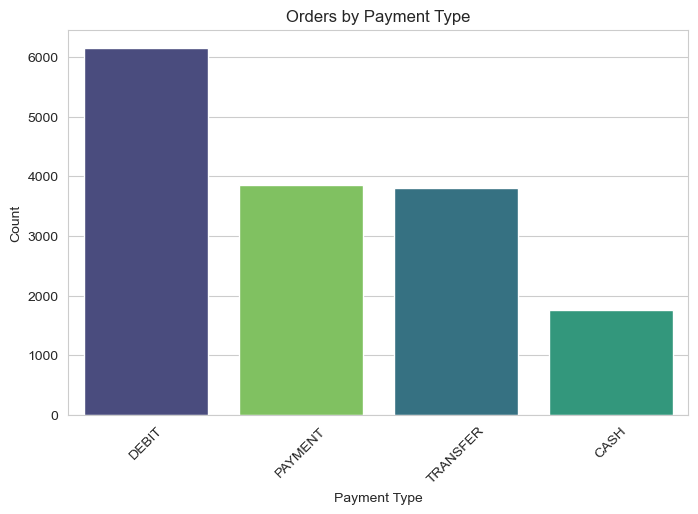

In [138]:
# Bar chart of payment types
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=df, order=df['payment_type'].value_counts().index, hue='payment_type', palette="viridis", legend=False)
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Orders by Payment Type")
plt.xticks(rotation=45)
plt.show()

##### Explanation of the Visualization:
- The bar chart represents the number of orders by different payment types.
- DEBIT is the most commonly used payment method, with the highest number of orders.
- PAYMENT and TRANSFER methods have a similar number of orders.
- CASH has the lowest number of orders, indicating that fewer customers prefer cash transactions.

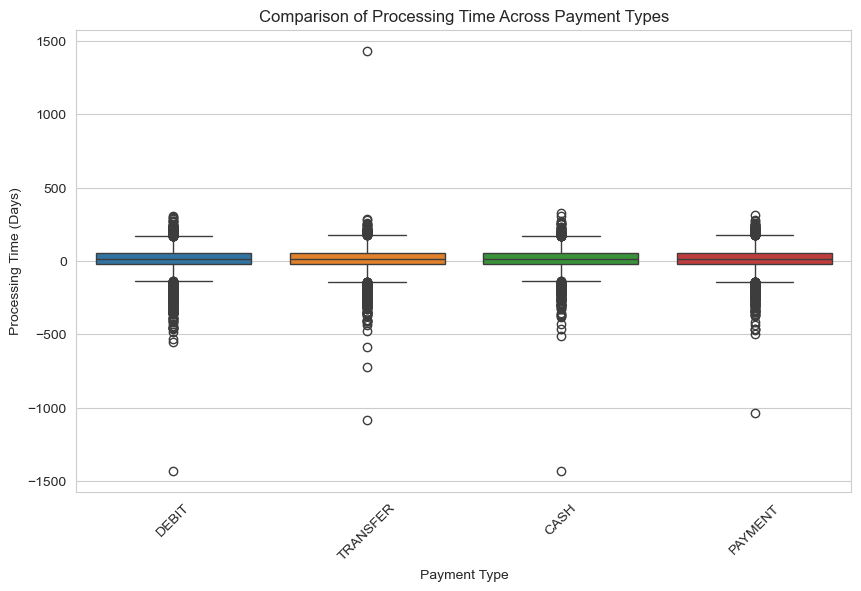

In [139]:
# Box plot to compare processing time across different payment types
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='processingTime', data=df5, hue='payment_type')
plt.xlabel("Payment Type")
plt.ylabel("Processing Time (Days)")
plt.title("Comparison of Processing Time Across Payment Types")
plt.xticks(rotation=45)
plt.show()

##### Explanation of the Box Plot:

- This box plot compares processing time (days) across different payment types.
- The majority of orders have a processing time close to zero, but there are many outliers.
- Extreme outliers (both positive and negative) indicate data quality issues or unusual cases (e.g., incorrect timestamps).
- The spread of processing times appears similar across all payment types, meaning payment method does not significantly impact processing time.

#### Distribution of Processing Time

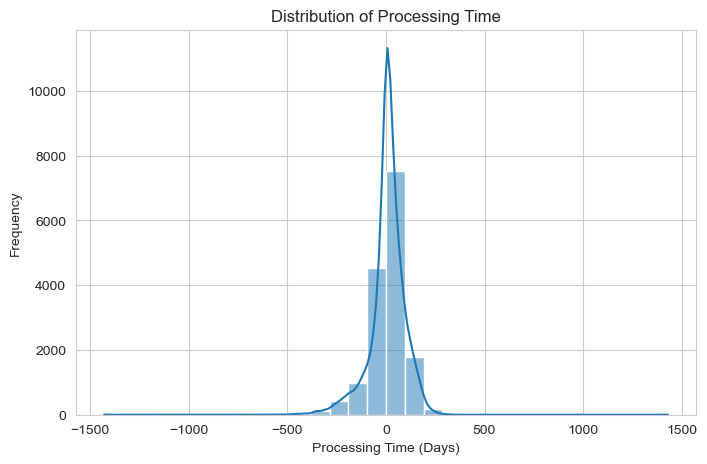

In [140]:
# Set style for plots
sns.set_style("whitegrid")

# Generate histograms for processing time
plt.figure(figsize=(8, 5))
sns.histplot(df5['processingTime'].dropna(), bins=30, kde=True)
plt.xlabel("Processing Time (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Processing Time")
plt.show()

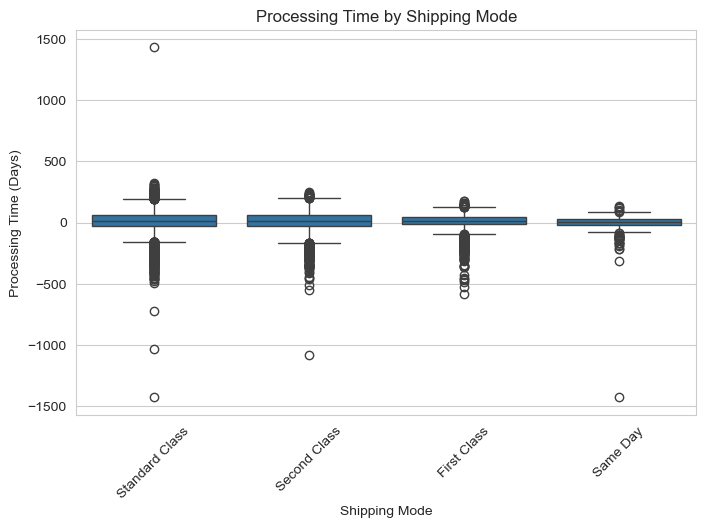

In [141]:
# Box plot for processing time per shipping mode
plt.figure(figsize=(8, 5))
sns.boxplot(x='shipping_mode', y='processingTime', data=df5)
plt.xlabel("Shipping Mode")
plt.ylabel("Processing Time (Days)")
plt.title("Processing Time by Shipping Mode")
plt.xticks(rotation=45)
plt.show()

#### Impact of Discounts

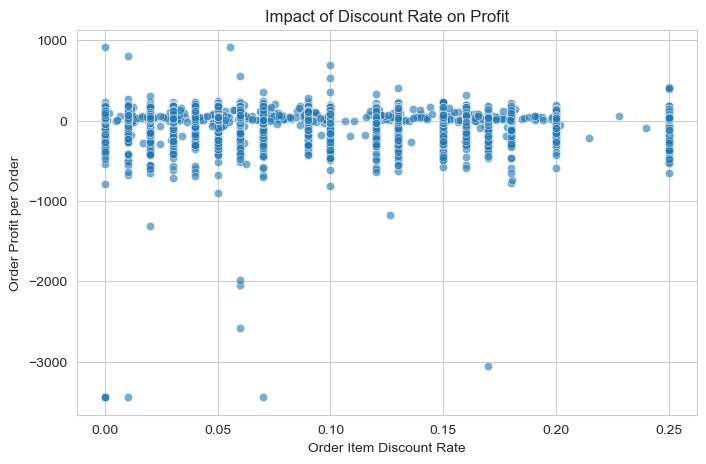

In [142]:
# Scatter plot of discount rate vs. order profit per order
plt.figure(figsize=(8, 5))
sns.scatterplot(x='order_item_discount_rate', y='order_profit_per_order', data=df5, alpha=0.6)
plt.xlabel("Order Item Discount Rate")
plt.ylabel("Order Profit per Order")
plt.title("Impact of Discount Rate on Profit")
plt.show()

##### Explanation of the Scatter Plot:
- This scatter plot visualizes the relationship between the Order Item Discount Rate and Order Profit per Order.
- The x-axis represents the discount rate, while the y-axis represents the profit per order.
- There is high variance in profitability, with some orders showing large negative profits.

#### Delayed Classification Analysis

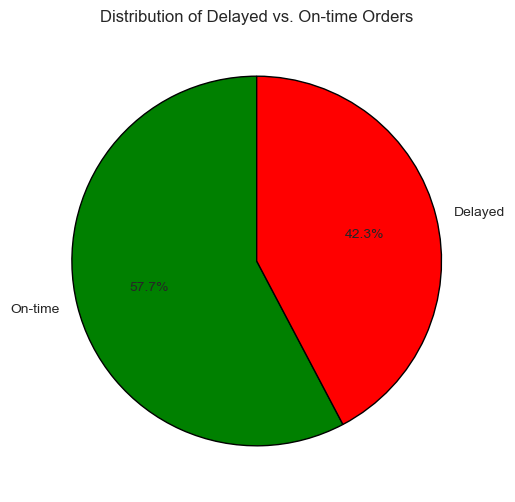

In [143]:
# Pie Chart: Distribution of Delayed vs. On-time Orders
plt.figure(figsize=(6, 6))
df7['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['On-time', 'Delayed'], 
                                    colors=['green', 'red'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Delayed vs. On-time Orders")
plt.ylabel('')  # Hide y-label
plt.show()

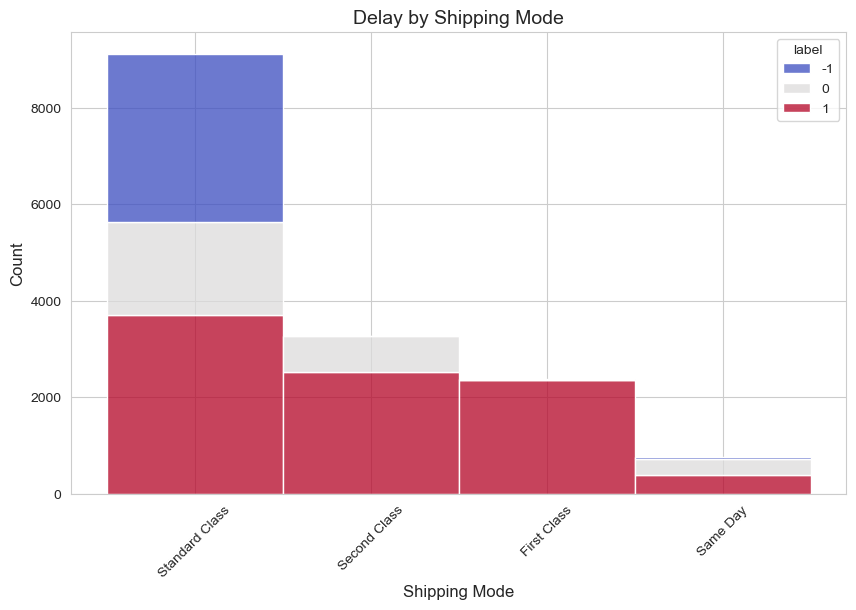

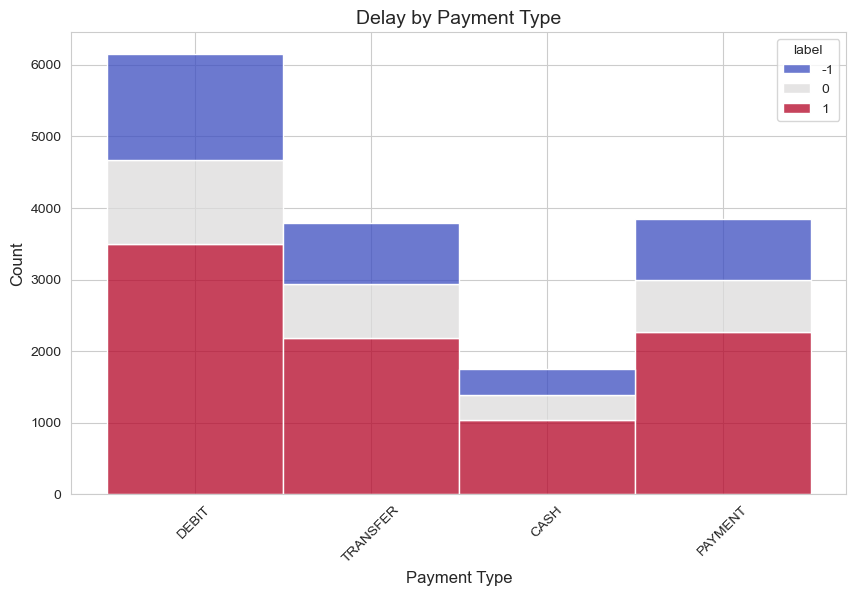

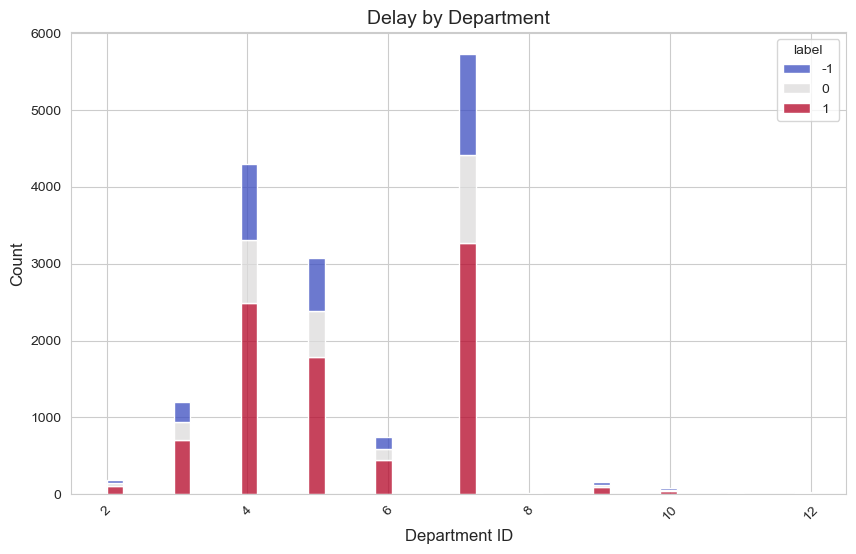

In [144]:
# Shipping Mode vs Label 
plt.figure(figsize=(10, 6))
sns.histplot(data=df5, x="shipping_mode", hue="label", multiple="stack", palette="coolwarm")
plt.title("Delay by Shipping Mode", fontsize=14)
plt.xlabel("Shipping Mode", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Payment Type vs Label
plt.figure(figsize=(10, 6))
sns.histplot(data=df5, x="payment_type", hue="label", multiple="stack", palette="coolwarm")
plt.title("Delay by Payment Type", fontsize=14)
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Department ID vs Label
plt.figure(figsize=(10, 6))
sns.histplot(data=df5, x="department_id", hue="label", multiple="stack", palette="coolwarm")
plt.title("Delay by Department", fontsize=14)
plt.xlabel("Department ID", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 800x500 with 0 Axes>

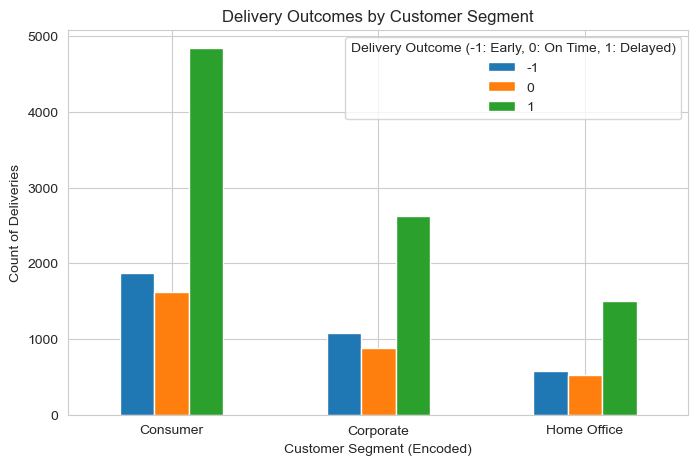

In [145]:
# Compute counts of each customer segment for each delivery outcome
customer_segment_counts = df.groupby(["customer_segment", "label"]).size().unstack()

# Bar Plot: Compare the number of deliveries for each segment
plt.figure(figsize=(8, 5))
customer_segment_counts.plot(kind="bar", stacked=False, figsize=(8,5))
plt.title("Delivery Outcomes by Customer Segment")
plt.xlabel("Customer Segment (Encoded)")
plt.ylabel("Count of Deliveries")
plt.legend(title="Delivery Outcome (-1: Early, 0: On Time, 1: Delayed)")
plt.xticks(rotation=0)
plt.show()

#### Geographic Visualization

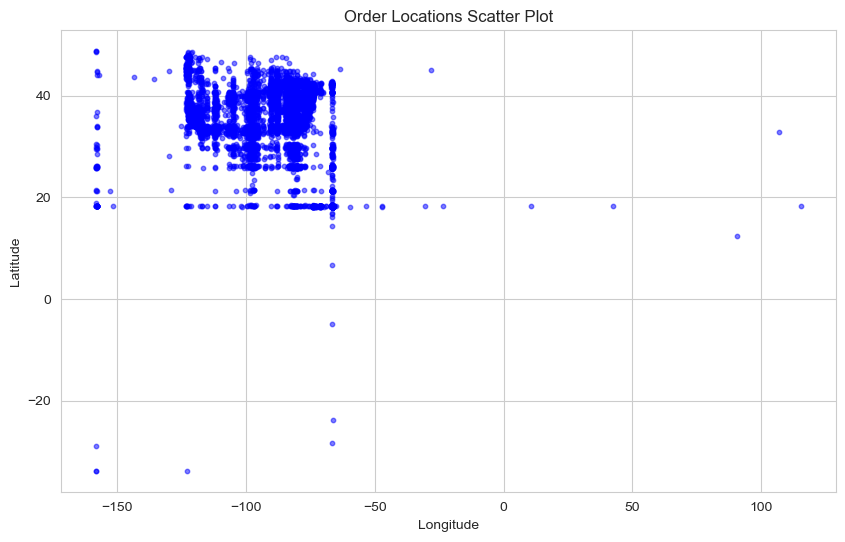

In [146]:
# Scatter Plot: Order Locations
plt.figure(figsize=(10, 6))
plt.scatter(df["longitude"], df["latitude"], c="blue", alpha=0.5, s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Order Locations Scatter Plot")
plt.show()

##### Explanation of the Scatter Plot:
- Most orders are concentrated in a specific region (likely North America).
- Some orders appear in unusual locations, suggesting possible data errors or international orders.
- Further filtering can help refine the geographic analysis for better accuracy.

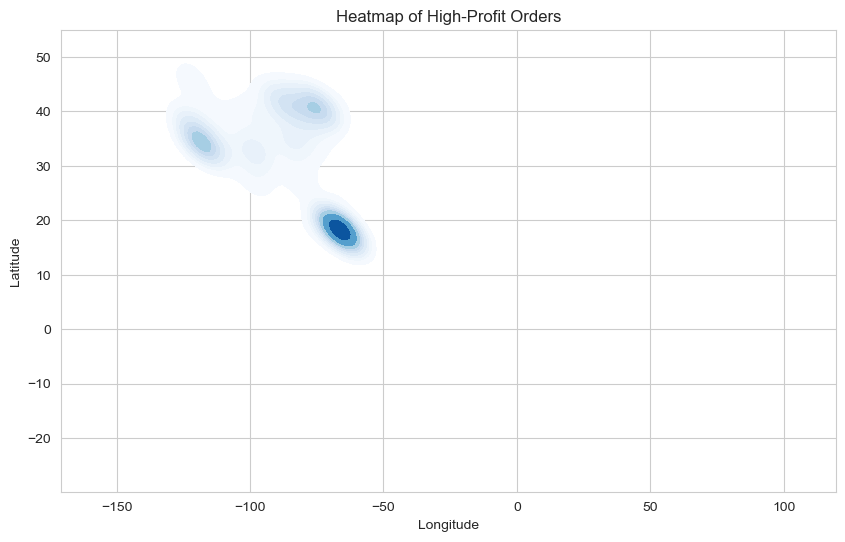

In [147]:
# Remove negative profits to avoid "aweights cannot be negative" error
df_filtered = df[df["order_profit_per_order"] > 0]

plt.figure(figsize=(10, 6))
sns.kdeplot(x=df_filtered["longitude"], y=df_filtered["latitude"], 
            weights=df_filtered["order_profit_per_order"], cmap="Blues", fill=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of High-Profit Orders")
plt.show()



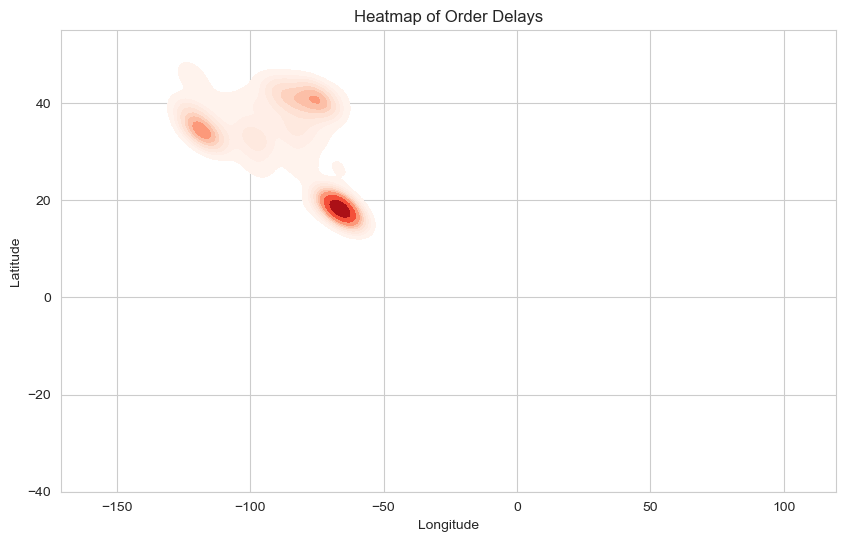

In [148]:
df_filtered = df[df["label"] >= 0]  # Keep only non-negative values

plt.figure(figsize=(10, 6))
sns.kdeplot(x=df_filtered["longitude"], y=df_filtered["latitude"], 
            weights=df_filtered["label"], cmap="Reds", fill=True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heatmap of Order Delays")
plt.show()

In [149]:
import pandas as pd
import plotly.express as px

# Define color mapping for delays
df["status"] = df["label"].map({0: "On-time", 1: "Delayed"})  # Map labels

# Create an interactive scatter map
fig = px.scatter_mapbox(
    df, 
    lat="latitude", 
    lon="longitude", 
    color="status", 
    hover_data=["order_profit_per_order", "shipping_mode", "payment_type"],
    title="Order Locations: On-time vs. Delayed",
    mapbox_style="open-street-map", 
    zoom=3,
    height=600
)

# Show the figure
fig.show()


In [180]:
import pandas as pd
import plotly.express as px

# Ensure relevant columns exist
if "latitude" in df.columns and "longitude" in df.columns and "label" in df.columns:
    # Convert label to categorical names
    df["status"] = df["label"].map({0: "On-time", 1: "Delayed"})
    
    # Filter for delayed orders only
    df_delayed = df[df["status"] == "Delayed"]
    
    # Create an interactive map focusing only on delayed orders
    fig = px.scatter_mapbox(
        df_delayed, 
        lat="latitude", 
        lon="longitude", 
        color="status", 
        title="Delayed Order Locations",
        hover_data=["shipping_mode", "payment_type"],
        mapbox_style="open-street-map", 
        zoom=3,
        height=600
    )
    
    # Show the figure
    fig.show()
else:
    print("Dataset is missing required columns (latitude, longitude, label). Please check the dataset.")


##### Explanation of the Map:
- Most orders are concentrated in the U.S., suggesting it is the primary market.
- Delays (red dots) are widely scattered, but appear more frequent in certain regions.
- Some orders are placed in unexpected locations (e.g., far south in Colombia), possibly due to data errors.

### Apply Machine Learning

In [150]:
# Spliting the features from the dataset df7, preparing it for Machine Learning
X = df7.drop('label'  , axis = 'columns')
y = df7['label']

# Training the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=1)


In [151]:
# Necessary libraries for Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report

#### Model 1: Decision Tree Classifier

In [152]:
model1 = DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced')

model1.fit(x_train, y_train)

print(model1.score(x_train,y_train))
print(model1.score(x_test,y_test))
print()

print("DecisionTreeClassifier")
print(classification_report(y_train,model1.predict(x_train)))
print()
print(classification_report(y_test,model1.predict(x_test)))

0.7133178972643855
0.7204218106995884

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.62      0.85      0.72      4913
           1       0.85      0.61      0.71      6748

    accuracy                           0.71     11661
   macro avg       0.73      0.73      0.71     11661
weighted avg       0.75      0.71      0.71     11661


              precision    recall  f1-score   support

           0       0.63      0.86      0.72      1660
           1       0.85      0.62      0.72      2228

    accuracy                           0.72      3888
   macro avg       0.74      0.74      0.72      3888
weighted avg       0.76      0.72      0.72      3888



#### Model 2: Random Forest Classifier

In [153]:
model2 = RandomForestClassifier(n_estimators=100,ccp_alpha=0.01,class_weight='balanced')

model2.fit(x_train,y_train)

print(model2.score(x_train,y_train))
print(model2.score(x_test,y_test))

print("RandomForestClassifier")
print(classification_report(y_train,model2.predict(x_train)))
print()
print(classification_report(y_test,model2.predict(x_test)))

0.705685618729097
0.7111625514403292
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.61      0.81      0.70      4913
           1       0.82      0.63      0.71      6748

    accuracy                           0.71     11661
   macro avg       0.72      0.72      0.71     11661
weighted avg       0.73      0.71      0.71     11661


              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1660
           1       0.82      0.63      0.72      2228

    accuracy                           0.71      3888
   macro avg       0.72      0.72      0.71      3888
weighted avg       0.74      0.71      0.71      3888



#### Model 3: AdaBoostClassifier (Adaptive Boosting)

In [154]:
model3 = AdaBoostClassifier(n_estimators=50,algorithm='SAMME')

model3.fit(x_train,y_train)

print(model3.score(x_train,y_train))
print(model3.score(x_test,y_test))

print()

from sklearn.metrics import classification_report
print("AdaBoostClassifier")
print(classification_report(y_train,model3.predict(x_train)))
print()
print(classification_report(y_test,model3.predict(x_test)))

0.7087728325186519
0.713477366255144

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.62      0.79      0.70      4913
           1       0.81      0.65      0.72      6748

    accuracy                           0.71     11661
   macro avg       0.72      0.72      0.71     11661
weighted avg       0.73      0.71      0.71     11661


              precision    recall  f1-score   support

           0       0.63      0.79      0.70      1660
           1       0.81      0.65      0.72      2228

    accuracy                           0.71      3888
   macro avg       0.72      0.72      0.71      3888
weighted avg       0.73      0.71      0.71      3888



#### Model 4: Gradient Boosting Classifier

In [155]:
model4 = GradientBoostingClassifier()

model4.fit(x_train,y_train)

print(model4.score(x_train,y_train))
print(model4.score(x_test,y_test))

print()

from sklearn.metrics import classification_report
print("AdaBoostClassifier")
print(classification_report(y_train,model4.predict(x_train)))
print()
print(classification_report(y_test,model4.predict(x_test)))

0.7345853700368751
0.7222222222222222

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      4913
           1       0.82      0.69      0.75      6748

    accuracy                           0.73     11661
   macro avg       0.74      0.74      0.73     11661
weighted avg       0.75      0.73      0.74     11661


              precision    recall  f1-score   support

           0       0.64      0.78      0.71      1660
           1       0.80      0.68      0.74      2228

    accuracy                           0.72      3888
   macro avg       0.72      0.73      0.72      3888
weighted avg       0.74      0.72      0.72      3888



#### Model 5: Stacking Classifier

In [156]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced',ccp_alpha=0.1)),
              ('svr', SVC(random_state=42, class_weight='balanced')), ('naivebayes', (GaussianNB()))]

model5 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(class_weight='balanced'))

model5.fit(x_train,y_train)

print(model4.score(x_train,y_train))
print(model4.score(x_test,y_test))

print()

from sklearn.metrics import classification_report
print("Stacking Classifier")
print(classification_report(y_train,model5.predict(x_train)))
print()
print(classification_report(y_test,model5.predict(x_test)))

0.7345853700368751
0.7222222222222222

Stacking Classifier
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      4913
           1       0.66      0.65      0.66      6748

    accuracy                           0.60     11661
   macro avg       0.59      0.60      0.59     11661
weighted avg       0.61      0.60      0.60     11661


              precision    recall  f1-score   support

           0       0.53      0.54      0.53      1660
           1       0.65      0.64      0.65      2228

    accuracy                           0.60      3888
   macro avg       0.59      0.59      0.59      3888
weighted avg       0.60      0.60      0.60      3888



### Apply Deep Learning

In [157]:
# Necessary libraries neeeded for both DL architertures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

#### Apply Model 1: MLP (Multilayer Perception)

In [175]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, Input, Concatenate, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [168]:
# Select features and target variable
target_variable = "label"  # Adjust based on your dataset

# Split into features (X) and target variable (y)
X = df6.drop(columns=[target_variable]) 
y = df6[target_variable]  

# Map labels (-1 → 2, 0 → 0, 1 → 1) to ensure non-negative encoding
y = y.map({-1: 2, 0: 0, 1: 1})
num_classes = len(np.unique(y))

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define MLP model
mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile MLP model with optimized settings
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Track training time
start_time = time.time()

# Train MLP model
history_mlp = mlp_model.fit(X_train, y_train, epochs=150, batch_size=64, 
                            validation_data=(X_test, y_test), callbacks=[early_stopping])

end_time = time.time()
training_time_mlp = end_time - start_time

# Print training time
print(f"MLP Model Training Time: {training_time_mlp:.2f} seconds")

# Evaluate model performance
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4385 - loss: 1.1941 - val_accuracy: 0.5412 - val_loss: 0.9432
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5512 - loss: 0.9390 - val_accuracy: 0.5675 - val_loss: 0.8494
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5604 - loss: 0.8935 - val_accuracy: 0.5904 - val_loss: 0.8151
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5575 - loss: 0.8574 - val_accuracy: 0.5920 - val_loss: 0.8040
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5745 - loss: 0.8428 - val_accuracy: 0.5955 - val_loss: 0.7972
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5692 - loss: 0.8344 - val_accuracy: 0.5968 - val_loss: 0.7939
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5812 - loss: 0.8165 - val_accuracy: 0.5997 - val_loss: 0.7905
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5829 - loss: 0.8154 - val_accu

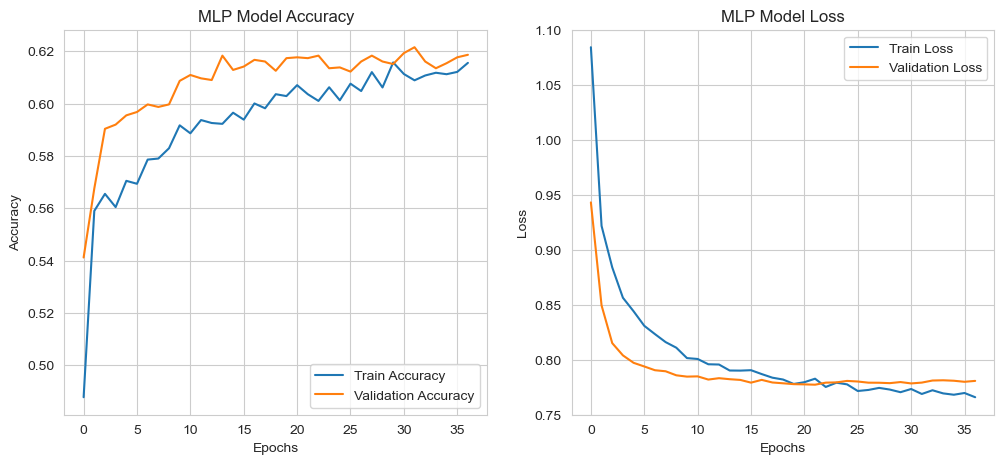

In [169]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP Model Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Model Loss")
plt.legend()

plt.show()

In [170]:
# Evaluate MLP model
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)
mlp_classification_report = classification_report(y_test, y_pred_mlp)

# Log results to a file
with open("training_log.txt", "a") as log_file:
    log_file.write(f"MLP Accuracy: {mlp_accuracy}\n")
    log_file.write(f"Training Time: {training_time_mlp:.2f} seconds\n")
    log_file.write(f"Model Configuration: MLP-256-128-64-32 layers with Dropout & BatchNorm, Learning Rate: 0.0003, Epochs: {len(history_mlp.history['loss'])}\n")
    log_file.write(f"Confusion Matrix:\n{mlp_conf_matrix}\n")
    log_file.write(f"Classification Report:\n{mlp_classification_report}\n\n")

print("MLP Accuracy:", mlp_accuracy)
print("Training Time:", training_time_mlp, "seconds")
print("MLP Confusion Matrix:\n", mlp_conf_matrix)
print("Classification Report:\n", mlp_classification_report)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MLP Accuracy: 0.617363344051447
Training Time: 27.46903133392334 seconds
MLP Confusion Matrix:
 [[  45  292  269]
 [  26 1347  422]
 [   9  172  528]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.07      0.13       606
           1       0.74      0.75      0.75      1795
           2       0.43      0.74      0.55       709

    accuracy                           0.62      3110
   macro avg       0.58      0.52      0.48      3110
weighted avg       0.64      0.62      0.58      3110



#### Apply Model 2: LSTM (Long Short-Term Memory)

In [166]:
# Select features and target variable
target_variable = "label"  # Adjust based on your dataset

# Split into features (X) and target variable (y)
X = df6.drop(columns=[target_variable]) 
y = df6[target_variable]  

# Map labels (-1 → 2, 0 → 0, 1 → 1) to ensure non-negative encoding
y = y.map({-1: 2, 0: 0, 1: 1})
num_classes = len(np.unique(y))

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
lstm_model = Sequential([
    Input(shape=(1, X_train.shape[2])),
    LSTM(128, activation='relu', return_sequences=True, kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile LSTM model with optimized settings
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Track training time
start_time = time.time()

# Train LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=150, batch_size=64, 
                              validation_data=(X_test, y_test), callbacks=[early_stopping])

end_time = time.time()
training_time_lstm = end_time - start_time

# Print training time
print(f"LSTM Model Training Time: {training_time_lstm:.2f} seconds")

# Evaluate model performance
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4303 - loss: 1.2112 - val_accuracy: 0.5621 - val_loss: 1.0566
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5449 - loss: 0.9565 - val_accuracy: 0.5566 - val_loss: 0.9333
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5509 - loss: 0.9134 - val_accuracy: 0.5666 - val_loss: 0.8565
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5721 - loss: 0.8719 - val_accuracy: 0.5727 - val_loss: 0.8487
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5725 - loss: 0.8622 - val_accuracy: 0.5775 - val_loss: 0.8321
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5777 - loss: 0.8412 - val_accuracy: 0.5817 - val_loss: 0.8186
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5823 - loss: 0.8237 - val_accuracy: 0.5852 - val_loss: 0.8120
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5815 - loss: 0.8254 - val_accu

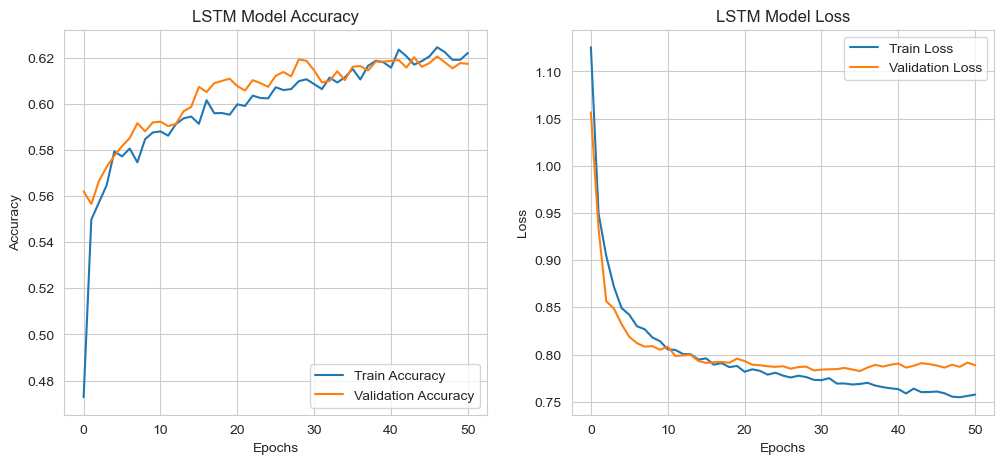

In [167]:
# Plot accuracy and loss curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM Model Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Model Loss")
plt.legend()

plt.show()

In [173]:
# Reshape test data to 3D (samples, timesteps, features)
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Evaluate LSTM model
y_pred_lstm = np.argmax(lstm_model.predict(X_test_reshaped), axis=1)
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_conf_matrix = confusion_matrix(y_test, y_pred_lstm)
lstm_classification_report = classification_report(y_test, y_pred_lstm)

# Log results to a file
with open("training_log.txt", "a") as log_file:
    log_file.write(f"LSTM Accuracy: {lstm_accuracy}\n")
    log_file.write(f"Training Time: {training_time_lstm:.2f} seconds\n")
    log_file.write(f"Model Configuration: LSTM-128-64-32 layers with Dropout & BatchNorm, Learning Rate: 0.0003, Epochs: {len(history_lstm.history['loss'])}\n")
    log_file.write(f"Confusion Matrix:\n{lstm_conf_matrix}\n")
    log_file.write(f"Classification Report:\n{lstm_classification_report}\n\n")

print("LSTM Accuracy:", lstm_accuracy)
print("Training Time:", training_time_lstm, "seconds")
print("LSTM Confusion Matrix:\n", lstm_conf_matrix)
print("Classification Report:\n", lstm_classification_report)

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM Accuracy: 0.6160771704180065
Training Time: 67.96462798118591 seconds
LSTM Confusion Matrix:
 [[  32  330  244]
 [  23 1362  410]
 [   8  179  522]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.05      0.10       606
           1       0.73      0.76      0.74      1795
           2       0.44      0.74      0.55       709

    accuracy                           0.62      3110
   macro avg       0.56      0.52      0.46      3110
weighted avg       0.62      0.62      0.57      3110



### Analysis of Results

- This section evaluates how MLP (Multi-Layer Perceptron) and LSTM (Long Short-Term Memory) performed on the dataset, identifies areas for improvement, and discusses optimization strategies.

| Model | Accuracy | Training Time (Seconds)
| --- | --- | --- |
| MLP | 0.6173 | 27.47s |
| LSTM | 0.6161 | 67.96s |

##### Key Observations
- Both models have similar accuracy (~61.7%), meaning neither shows a significant performance advantage.
- LSTM takes more than twice the training time compared to MLP, indicating higher computational complexity.
- Class 1 (support = 1795) has the highest F1-score (~0.75), meaning it's classified well.
- Class 0 (support = 606) has the lowest F1-score (~0.10), meaning it struggles to differentiate this class.

#####  Strengths and Weaknesses

**Strengths:**
- MLP and LSTM both show strong classification performance on Class 1.
- LSTM learns sequential patterns, making it useful for time-series problems.
- Both models have reasonable precision and recall, meaning predictions aren’t overly biased toward one class.

**Weaknesses:**
- Low recall for Class 0 (7% for MLP, 5% for LSTM), meaning the models fail to recognize some important patterns.
- MLP and LSTM both struggle with underrepresented classes, leading to imbalanced predictions.
- Training time for LSTM is significantly longer, making it less efficient.
- Overall accuracy is ~61%, which is quite low for deep learning models.

##### Areas for Development

1. **Data Preprocessing Improvements**
- **Balance the dataset:** Oversample or undersample underrepresented classes.
- **Feature selection:** Remove irrelevant or redundant features that may confuse the model.
- **Normalization and standardization:** Ensure all numerical values are scaled properly.

2. **Hyperparameter Optimization**
- **Learning rate tuning:** Experiment with different learning rates (0.001, 0.0005, 0.0001).
- **Number of layers and neurons:** Increase/decrease layers in the model to find the optimal depth.
- **Dropout adjustments:** Reduce overfitting by tuning dropout rates.

3. Architecture Optimization
- **MLP Improvements:** Add more dense layers with batch normalization.
- **LSTM Improvements:** Try bidirectional LSTM or GRU instead of vanilla LSTM.
- **Hybrid Models:** Combine LSTM with CNN or MLP to capture both spatial and sequential features.

4. Model Training Strategies
- **Early stopping & learning rate reduction on plateau** can help models generalize better.
- **Use data augmentation** if applicable to create variations of underrepresented data.
- **Try different activation functions** (ReLU, Leaky ReLU, etc.).

##### Optimization Strategies
1. **Tuning Hyperparameters**
- Use Grid Search or Bayesian Optimization to fine-tune learning rates, batch sizes, and dropout rates.
- Try different optimizers (Adam, RMSprop, Nadam) to see which converges faster and better.
2. **Alternative Architectures**
- Use CNN-LSTM hybrid models for sequential data.
- Experiment with Transformer-based models like BERT or attention mechanisms for better feature extraction.
3. **Improve Data Handling**
- Apply SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalances.
- Feature engineering: Create better representations that may help distinguish between classes.

##### Final Thoughts
- LSTM is computationally expensive but may not be the best fit for this dataset.
- MLP performs slightly better in efficiency, but improvements are needed in recall for minority classes.
- Optimization is required in data preprocessing, hyperparameter tuning, and model architecture.
- Considering other architectures such as CNN-LSTM hybrids or attention-based models could improve performance.
